In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install yfinance

# 단계 1: 데이터 로딩 및 기본 탐색

### 라이브러리 임포트:

pandas: 데이터 처리와 분석을 위한 라이브러리입니다. 이를 사용하여 데이터를 다루고 분석할 수 있습니다.
yfinance: Yahoo Finance의 데이터를 쉽게 다운로드할 수 있게 해주는 라이브러리입니다.
matplotlib.pyplot 및 seaborn: 이 두 라이브러리는 데이터를 시각화하는 데 사용됩니다. matplotlib은 그래프를 그리는 기본적인 도구를 제공하며, seaborn은 matplotlib을 기반으로 좀 더 향상된 시각화 기능을 제공합니다.

---

### 데이터 불러오기:
yf.download: Yahoo Finance에서 주식 데이터를 다운로드합니다. 여기서는 '005930.KS' (삼성전자의 주식 코드)에 해당하는 데이터를 2018년 11월 1일부터 2023년 11월 1일까지 다운로드합니다.

---

### 기본 데이터 탐색:
samsung_stock.head(): 데이터프레임의 처음 몇 행을 출력하여 데이터의 개요를 살펴봅니다.
samsung_stock.dtypes: 각 컬럼의 데이터 타입을 출력합니다.
samsung_stock.describe(): 수치형 컬럼들에 대한 요약 통계를 제공합니다. 이는 평균, 표준편차, 최소값, 최대값 등의 정보를 포함합니다.

---

### 종가 데이터 시각화:
plt.figure: 시각화의 크기를 설정합니다.
plt.plot: 삼성전자의 종가 데이터를 선 그래프로 그립니다.
plt.title, plt.xlabel, plt.ylabel: 그래프의 제목과 x, y축의 레이블을 설정합니다.
plt.show(): 설정한 그래프를 화면에 표시합니다.

[*********************100%%**********************]  1 of 1 completed
               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2018-11-01  42450.0  42950.0  42150.0  42150.0  36764.203125  13423132
2018-11-02  43050.0  44250.0  42800.0  44150.0  38508.652344  16517112
2018-11-05  43750.0  43800.0  42900.0  43800.0  38203.367188   9426777
2018-11-06  43750.0  43800.0  42950.0  43750.0  38159.757812   7713625
2018-11-07  43600.0  44500.0  43400.0  44000.0  38377.820312  11553998

Data Types:
 Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Summary Statistics:
                Open          High           Low         Close     Adj Close  \
count   1231.000000   1231.000000   1231.000000   1231.000000   1231.000000   
mean   61868.318440  62411.575955  61298.212835  61833.184403  58581.523111   
std    12615.340365  

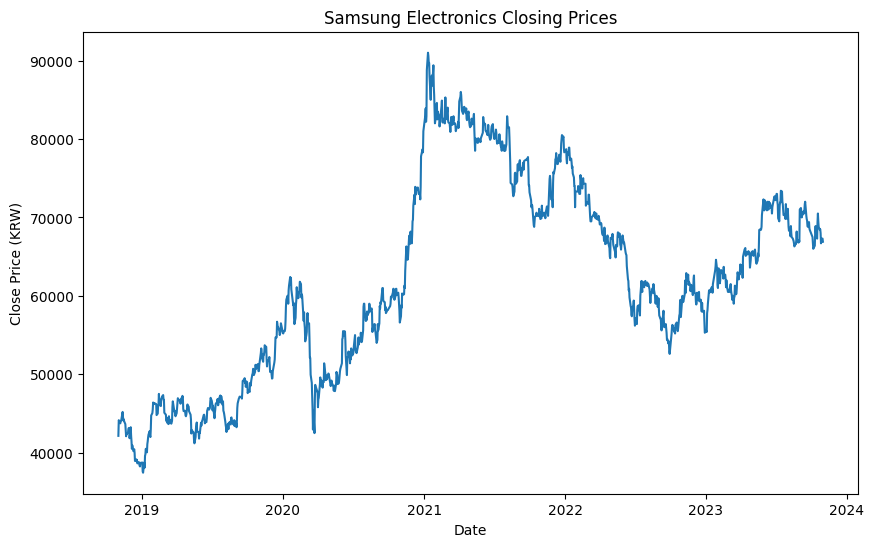

In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Yahoo Finance에서 삼성전자 주식 데이터 불러오기
samsung_stock = yf.download('005930.KS', start="2018-11-01", end="2023-11-01")

# 기본 데이터 탐색
print(samsung_stock.head())
print("\nData Types:\n", samsung_stock.dtypes)
print("\nSummary Statistics:\n", samsung_stock.describe())

# 종가 데이터 시각화
plt.figure(figsize=(10, 6))
plt.plot(samsung_stock['Close'])
plt.title('Samsung Electronics Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price (KRW)')
plt.show()


# 단계 2: 특성 엔지니어링 및 데이터 전처리

### 특성 엔지니어링:

새로운 특성 High-Low와 Open-Close를 생성합니다. 이는 각각 하루 중 주가의 최고가와 최저가 간의 차이, 그리고 시가와 종가 간의 차이를 나타냅니다. 이러한 특성들은 주가의 일일 변동성을 측정하는 데 유용할 수 있습니다.

---

### 필요한 특성 선택:

모델에 사용할 특성을 선정합니다. 여기서는 'Open', 'High', 'Low', 'Close', 'Volume', 'High-Low', 'Open-Close' 등이 선택됩니다.

---

### 타겟 변수 설정:

타겟 변수로서 다음 날의 종가(Close)를 예측하기 위해 Target 컬럼을 생성합니다. shift(-1) 함수는 각 행의 Close 값을 한 칸씩 위로 이동시켜 다음 날의 종가를 나타내도록 합니다.

---

### 결측치 제거:

dropna() 함수를 사용하여 결측치가 있는 행을 제거합니다. 이는 데이터의 정확성을 유지하기 위해 필요한 단계입니다.

---

### 특성과 타겟 분리:

데이터를 특성(X)과 타겟(y)으로 분리합니다.

---

### 데이터 분할:

train_test_split 함수를 사용하여 데이터를 훈련 세트와 테스트 세트로 나눕니다. 여기서는 데이터의 20%를 테스트 세트로 사용합니다.

---

### 데이터 정규화:

StandardScaler를 사용하여 특성 데이터를 정규화합니다. 이는 모델의 성능을 향상시키는 데 도움이 됩니다. 훈련 데이터에는 fit_transform을, 테스트 데이터에는 transform을 사용합니다. 이렇게 하는 이유는 모델이 테스트 데이터에 대한 정보를 미리 알지 못하게 하기 위함입니다.

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 특성 엔지니어링: 고가-저가 차이, 시가-종가 차이
samsung_stock['High-Low'] = samsung_stock['High'] - samsung_stock['Low']
samsung_stock['Open-Close'] = samsung_stock['Open'] - samsung_stock['Close']

# 필요한 특성 선택
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'High-Low', 'Open-Close']

# 타겟 변수 설정 (다음 날의 종가 예측)
samsung_stock['Target'] = samsung_stock['Close'].shift(-1)

# 결측치 제거
samsung_stock = samsung_stock.dropna()

# 특성과 타겟 분리
X = samsung_stock[features]
y = samsung_stock['Target']

# 데이터 분할: 훈련 데이터와 테스트 데이터
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 단계 3: 모델 학습 및 평가

이 코드는 XGBoost 모델을 사용하여 주식 가격을 예측하고, 테스트 데이터에 대한 예측 결과의 RMSE (Root Mean Squared Error) 값을 계산합니다. 또한, 실제 값과 예측 값의 비교를 위한 시각화도 포함되어 있습니다.

### 데이터셋 준비:

예측 모델에 사용할 특성(features)과 타겟 변수(target)를 정의합니다.
X는 모델의 입력 특성, y는 예측하려는 타겟 변수(여기서는 'Close' 종가)입니다.

---

### 데이터 정규화:

StandardScaler를 사용하여 특성 데이터를 정규화합니다. 이는 모든 특성이 동일한 스케일을 갖도록 하여 모델의 학습 효율성을 높입니다.

---

### 시계열 교차 검증 설정:

TimeSeriesSplit을 사용하여 시계열 데이터의 교차 검증을 설정합니다. 시계열 데이터의 경우, 순차적인 정보가 중요하기 때문에 일반적인 교차 검증 방법 대신 시계열에 특화된 방법을 사용합니다.

---

### 훈련 및 검증 세트 준비:

교차 검증에서 생성된 각 fold의 훈련 및 검증 인덱스를 저장합니다.
마지막 fold를 훈련 및 검증 세트로 사용합니다.

---

### 모델 정의 및 훈련:

XGBRegressor를 사용하여 XGBoost 회귀 모델을 정의하고 훈련합니다. 여기서는 100개의 추정기와 최대 깊이 3, 학습률 0.1을 사용합니다.

---

### 모델 예측 및 평가:

개발(검증) 세트에서의 예측 값을 구하고, 실제 값과 비교하여 평균 제곱근 오차(RMSE)를 계산합니다.

---

### 테스트 데이터 준비 및 예측:

데이터의 마지막 20%를 테스트 데이터로 가정하고, 이에 대한 예측을 수행합니다.

---

### 결과 시각화:

훈련, 검증, 테스트 세트 및 모델 예측 결과를 시각화합니다. 이를 통해 모델의 성능을 시각적으로 파악할 수 있습니다.

---

### 성능 지표 출력:

개발(검증) 세트에 대한 모델의 RMSE를 출력합니다.
이 코드는 주식 가격 예측을 위한 전형적인 머신러닝 워크플로우를 따르며, 시계열 데이터의 특성을 고려한 교차 검증 방식을 채택합니다. RMSE는 모델의 예측 정확도를 측정하는 데 중요한 지표로 사용됩니다.


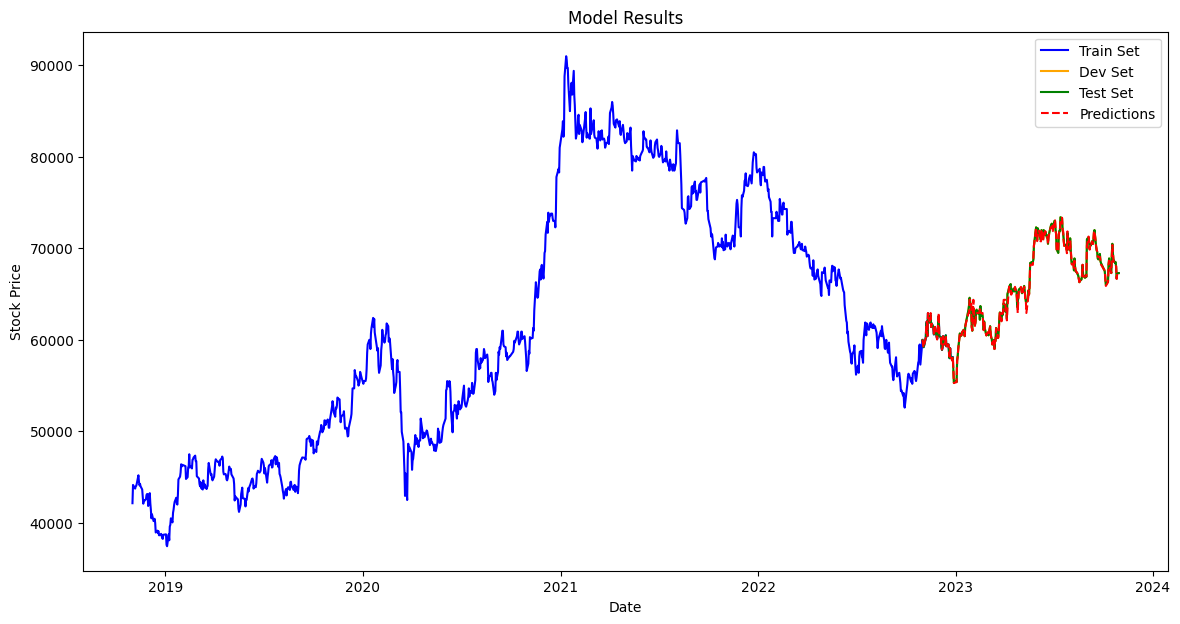

RMSE on Dev Set: 306.7762120031625


In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

features = ['Open', 'High', 'Low', 'Close', 'Volume']
target = 'Close'

# 데이터셋 준비
X = samsung_stock[features]
y = samsung_stock[target]

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 시계열 교차 검증 설정
tscv = TimeSeriesSplit(n_splits=5)

# 훈련 및 검증 세트 인덱스 저장을 위한 리스트
train_indices = []
dev_indices = []

for train_index, dev_index in tscv.split(X_scaled):
    train_indices.append(train_index)
    dev_indices.append(dev_index)

# 마지막 fold의 훈련 및 검증 세트
train_index = train_indices[-1]
dev_index = dev_indices[-1]

# 마지막 fold를 훈련 및 검증 세트로 분할
X_train, X_dev = X_scaled[train_index], X_scaled[dev_index]
y_train, y_dev = y.iloc[train_index], y.iloc[dev_index]

# 모델 정의
model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)

# 모델 훈련
model.fit(X_train, y_train)

# 모델 예측
dev_predictions = model.predict(X_dev)

# 모델 성능 평가
mse = mean_squared_error(y_dev, dev_predictions)
rmse = np.sqrt(mse)

# 테스트 데이터 준비 및 예측 (가정: 테스트 데이터는 분할된 마지막 20%를 사용)
test_size = int(len(X_scaled) * 0.2)
X_test = X_scaled[-test_size:]
y_test = y.iloc[-test_size:]

# 테스트 세트에 대한 모델 예측
test_predictions = model.predict(X_test)

# 결과 시각화를 위한 날짜 인덱스 추출
dates = samsung_stock.index
train_dates = dates[train_index]
dev_dates = dates[dev_index]
test_dates = dates[-test_size:]

# 모델 결과 시각화
plt.figure(figsize=(14, 7))

# 훈련 세트 시각화
plt.plot(train_dates, y_train, color='blue', label='Train Set')

# 개발(검증) 세트 시각화
plt.plot(dev_dates, y_dev, color='orange', label='Dev Set')

# 테스트 세트 시각화
plt.plot(test_dates, y_test, color='green', label='Test Set')

# 예측 결과 시각화
plt.plot(test_dates, test_predictions, color='red', linestyle='--', label='Predictions')

plt.title('Model Results')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# RMSE 출력
print(f"RMSE on Dev Set: {rmse}")


# 단계 4: 예측 결과 분석 및 인사이트 도출

위 코드는 실제 주가와 예측 주가 사이의 오차를 계산하고, 이 오차의 평균과 표준 편차를 출력합니다. 또한, 오차의 분포와 시간에 따른 변화를 시각화하여, 모델의 예측이 어느 정도 일관되게 벗어나는지, 또는 특정 패턴이 있는지를 분석합니다.

이러한 분석을 통해 모델의 성능을 더욱 세밀하게 이해하고, 예측이 언제 정확하고 언제 오차가 큰지에 대한 통찰을 얻을 수 있습니다. 예측 오차에 대한 이해는 모델을 개선하고, 더 나은 투자 결정을 내리는 데 도움이 될 수 있습니다.

### 예측 결과와 실제 데이터 비교:

comparison_df 데이터프레임을 생성하여 실제 값(y_test)과 예측 값(test_predictions)을 비교합니다.
오차는 실제 값과 예측 값의 차이(Actual - Predicted)로 계산됩니다.

---

### 오차 분석:

오차의 평균(error_mean)과 표준편차(error_std)를 계산하여 모델의 예측 오차에 대한 일반적인 정보를 제공합니다.
평균 오차는 모델이 얼마나 정확하게 예측하는지, 표준편차는 예측의 일관성을 나타냅니다.

---

### 오차의 분포 시각화:

sns.histplot을 사용하여 오차의 분포를 히스토그램으로 시각화합니다. KDE(Kernel Density Estimate)는 오차의 밀도 추정치를 함께 제공합니다.
이 시각화를 통해 모델의 오차가 어떤 분포를 가지고 있는지 파악할 수 있습니다.

---

### 인사이트 도출:

오차 데이터를 분석하여 모델의 성능에 대한 추가적인 인사이트를 도출할 수 있습니다. 예를 들어, 오차가 특정 기간에 집중되어 있는지, 일정한 패턴을 보이는지 분석할 수 있습니다.
이러한 분석은 모델이 특정 상황에서 더 잘 또는 못하는 경향이 있는지 파악하는 데 도움이 됩니다.


Mean Error: 45.3192962398374
Standard Deviation of Error: 279.6529196930982


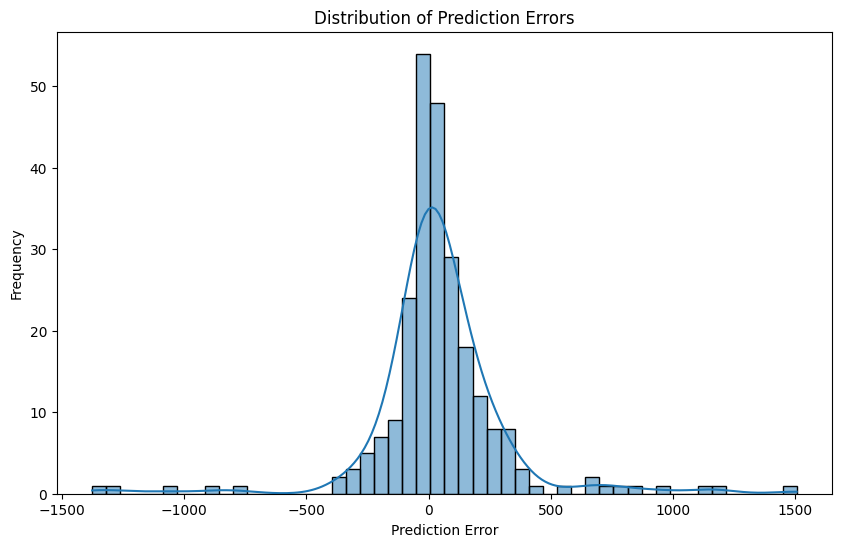

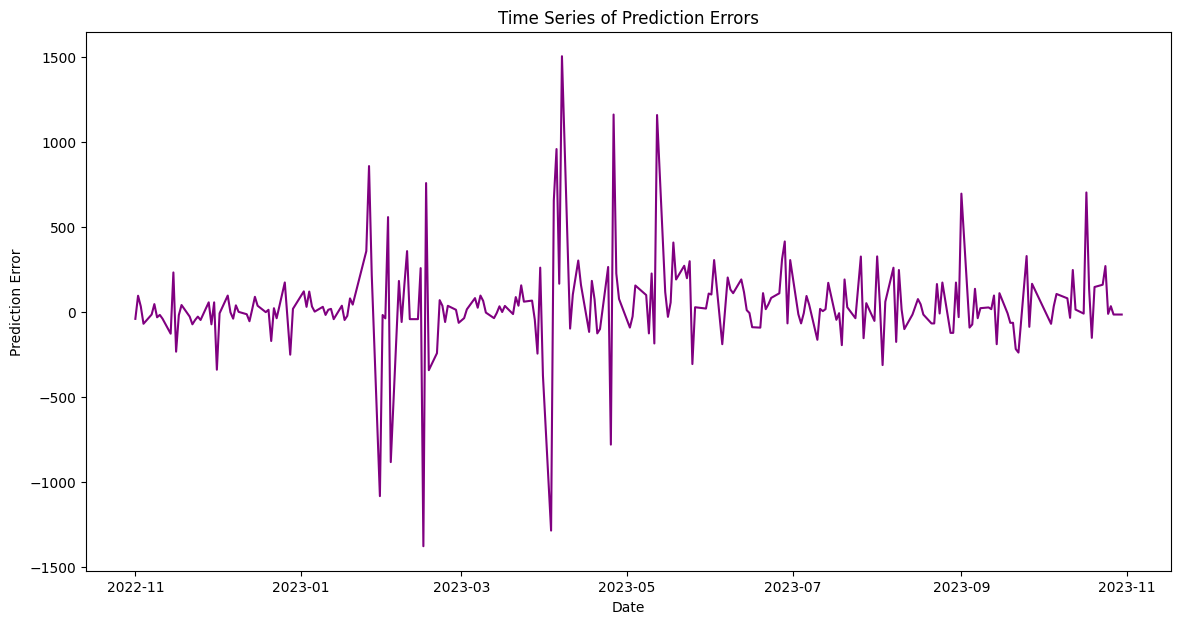

In [6]:
import seaborn as sns

# 예측 결과와 실제 데이터 비교
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': test_predictions})
comparison_df['Error'] = comparison_df['Actual'] - comparison_df['Predicted']

# 오차 분석
error_mean = comparison_df['Error'].mean()
error_std = comparison_df['Error'].std()
print(f"Mean Error: {error_mean}")
print(f"Standard Deviation of Error: {error_std}")

# 오차의 분포를 시각화
plt.figure(figsize=(10, 6))
sns.histplot(comparison_df['Error'], bins=50, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

# 인사이트 도출
# 예를 들어, 오차가 특정 기간에 집중되어 있는지 분석하기 위해
# 오차 데이터에 시간 정보를 추가합니다.
comparison_df['Date'] = test_dates

# 시간에 따른 오차 시각화
plt.figure(figsize=(14, 7))
plt.plot(comparison_df['Date'], comparison_df['Error'], color='purple')
plt.title('Time Series of Prediction Errors')
plt.xlabel('Date')
plt.ylabel('Prediction Error')
plt.show()

# 이 그래프를 분석하여 모델이 특정 기간에 더 잘 또는 못하는 경향을 파악할 수 있습니다.


# 단계 5: 미래 주가 예측 시도

### 데이터셋 준비:
주식의 여러 특성들(Open, High, Low, Close, Volume)을 포함하는 데이터셋을 준비하고, 종가(Close)를 예측 목표(target)로 설정합니다.

---

### 데이터 정규화:
StandardScaler를 사용해 특성 데이터를 정규화하여, 각 특성이 동일한 스케일을 갖도록 변환합니다.
이는 모델의 학습 성능을 향상시키기 위해 필수적인 단계입니다.

---

### 모델 정의 및 훈련:
XGBRegressor로 XGBoost 회귀 모델을 정의하고, 정규화된 데이터로 모델을 훈련시킵니다.
이 과정은 데이터에서 패턴을 학습하여 미래의 종가를 예측할 수 있게 합니다.

---

### 미래 예측을 위한 데이터 생성:
마지막 알려진 데이터를 복제하여 다음 날의 특성 데이터를 생성합니다. 여기서는 1일치 데이터만 예측합니다.

---

### 미래 데이터에 대한 주가 예측:
훈련된 모델을 사용해 생성된 미래 데이터의 주가를 예측합니다.

---

### 결과 시각화:
matplotlib 라이브러리를 이용해 결과를 시각화합니다. 과거 주가와 예측된 다음 날의 주가를 동일한 그래프에 표시합니다.
과거 주가는 파란색 선으로, 예측된 주가는 빨간색 점선으로 나타내어 뚜렷이 구분합니다.
x축의 범위를 xlim을 사용해 특정 기간으로 제한합니다, 여기서는 2023년 10월 1일부터 11월 1일까지입니다.


<ipython-input-13-2f25b31ed8a0>:22: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(start=samsung_stock.index[-1], periods=2, closed='right')


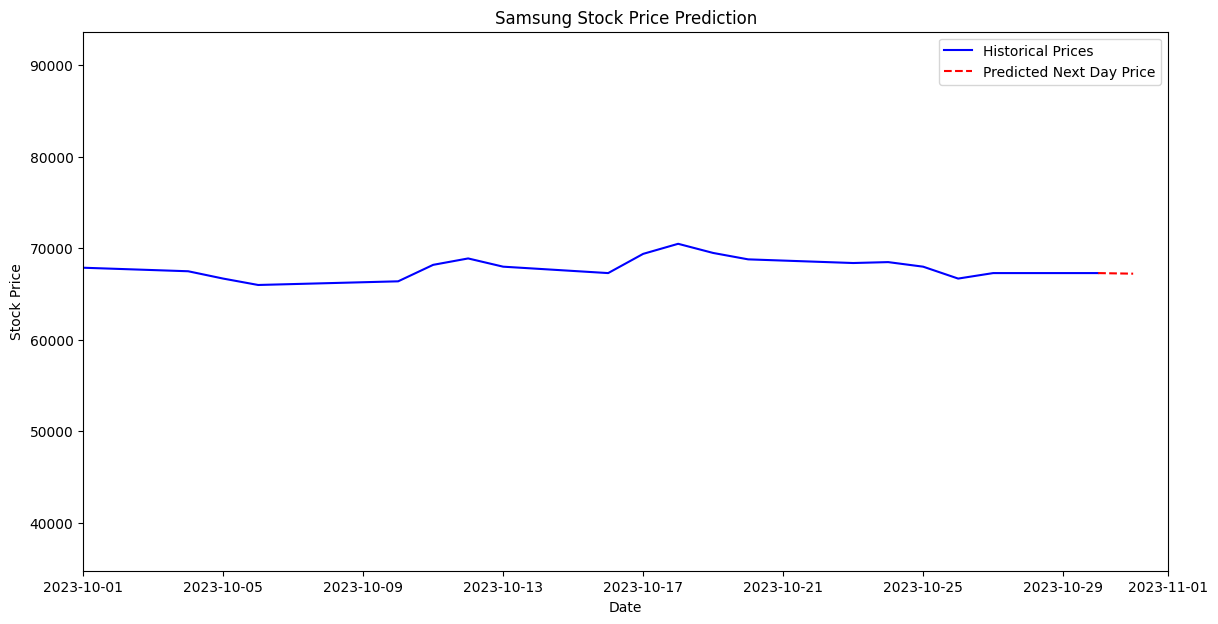

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

# 데이터셋 준비
features = ['Open', 'High', 'Low', 'Close', 'Volume']
target = 'Close'
X = samsung_stock[features]
y = samsung_stock[target]

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 모델 정의 및 훈련
model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
model.fit(X_scaled, y)

# 미래 예측을 위한 가상의 데이터 생성 (예: 마지막 데이터를 기반으로 1일치 데이터 생성)
future_dates = pd.date_range(start=samsung_stock.index[-1], periods=2, closed='right')
future_data = np.tile(X_scaled[-1], (1, 1))  # 1일 후 데이터만 생성

# 미래 데이터에 대한 주가 예측
future_predictions = model.predict(future_data)

# 마지막 날짜와 그 다음 날짜 두 개를 포함하도록 future_dates 수정
last_date = samsung_stock.index[-1]
next_date = last_date + pd.Timedelta(days=1)
plot_dates = [last_date, next_date]

# 결과 시각화
plt.figure(figsize=(14, 7))
plt.plot(samsung_stock.index, y, color='blue', label='Historical Prices')
plt.plot(plot_dates, [y.iloc[-1], future_predictions[0]], color='red', linestyle='--', label='Predicted Next Day Price')
plt.xlim(pd.Timestamp('2023-10-01'), pd.Timestamp('2023-11-1'))

plt.title('Samsung Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

